In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
national_df = pd.read_csv("../data/national_housing.csv")
state_df = pd.read_csv("../data/state_housing.csv")

In [49]:
metric = 'Median Listing Price'
month = 'December'
year = 2022
method = 'lowest'

def percent_higher_lower(metric, month, year, method):
    # Filter data for the specific month and year
    local_filtered_df = state_df.query(f"month == '{month}' and year =={year}")
    
    # Are we comparing the highest or lowest state?
    if method == 'highest':
        
        # Find the row that has the highest value for the specific metric
        metric_row = local_filtered_df.sort_values(by = f'{metric}', ascending = False).iloc[0]
    elif method == 'lowest':
        
        
        # Find the row that has the lowest value for the specific metric
        metric_row = local_filtered_df.sort_values(by = f'{metric}', ascending = True).iloc[0]
    
    else:
        raise ValueError("No correct method type highest or lowest")
        
    # Find the state and metric value of the row
    metric_value = metric_row[f"{metric}"]
    state = metric_row['state']

    # Filter data for national dataframe
    national_local_filtered_df = national_df.query(f"month == '{month}' and year =={year}")

    # Find the metric value at the national level
    national_metric_value = national_local_filtered_df.iloc[0][f'{metric}']

    # Find how much higher/lower the metric value is than the national value
    percent_change = abs(round(((metric_value - national_metric_value) / national_metric_value) * 100,0).astype(int))

    return metric_value, state, percent_change

percent_higher(metric, month, year, method)

(219000.0, 'West Virginia', 46)

In [22]:
metric = 'Median Listing Price'
month = 'December'
year = 2022

def national_comparison(metric, month, year)
    # Find the national value of the metric
    national_value = national_df.query(f"year == {year} and month == '{month}'").iloc[0][f"{metric}"]

    # Filter the dataframe for the month and year
    local_filtered_df = state_df.query(f"year == {year} and month == '{month}'")

    # Find how many states are above the national value
    states_num_above = len(local_filtered_df[local_filtered_df[f'{metric}'] >= national_value])

    # Find what percentage of all states are above the national value
    percent_states_above = states_num_above / len(local_filtered_df)

    return states_num_above, percent_states_above

23

C:\Users\kidsa\AppData\Local\Temp\ipykernel_8168\3543164848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_filtered_df[f'{metric} Yearly Average'] = local_filtered_df.groupby('year')[f'{metric}'].transform('mean')
C:\Users\kidsa\AppData\Local\Temp\ipykernel_8168\3543164848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_filtered_df[f'{metric} Percentage of Average'] = (local_filtered_df[f'{metric}'] / local_filtered_df[f'{metric} Yearly Average']) * 100
C:\Users\kidsa\AppData\Local\Temp

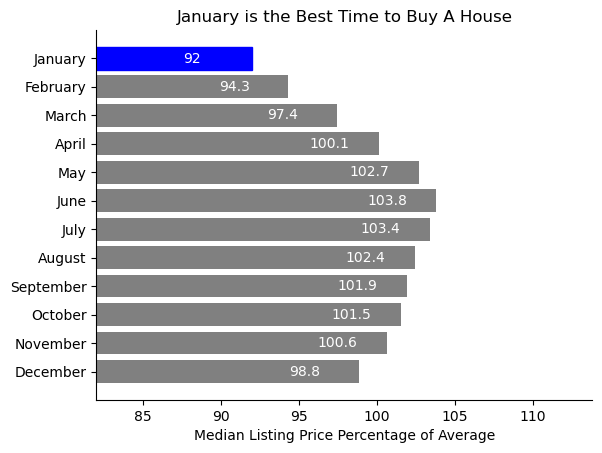

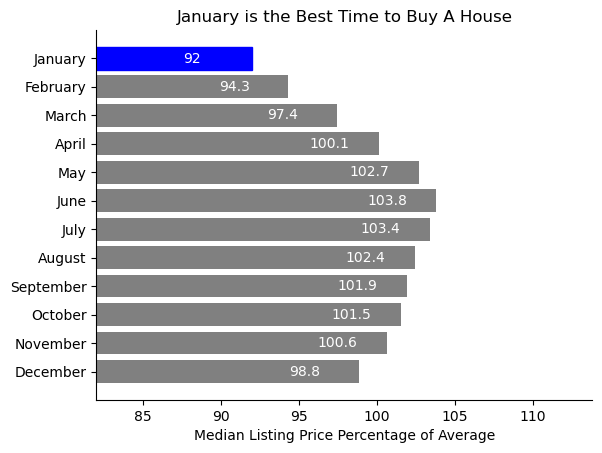

In [36]:
def best_time_buy(metric):
    
    local_filtered_df = national_df.query('year != 2024')

    local_filtered_df[f'{metric} Yearly Average'] = local_filtered_df.groupby('year')[f'{metric}'].transform('mean')

    local_filtered_df[f'{metric} Percentage of Average'] = (local_filtered_df[f'{metric}'] / local_filtered_df[f'{metric} Yearly Average']) * 100

    # Make months a categorical variable with an order
    month_order = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
    local_filtered_df['month'] = pd.Categorical(local_filtered_df['month'], categories = month_order, ordered = True)

    agg_value = local_filtered_df.groupby('month')[f'{metric} Percentage of Average'].mean().reset_index()

    agg_value = agg_value.sort_values('month', ascending = False)

    metric = f'{metric} Percentage of Average'

    # Define x and y
    x = agg_value[f'{metric}']
    y = agg_value['month']

    # Round x values
    x = round(x,1)

    # Create horizontal bar chart for top 10 states
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, month, value in zip(bars, y, x):
        if value == x.min():
            best_month = month
            bar.set_color('blue')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'{best_month} is the Best Time to Buy A House')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    # Calculate the max of the metric and round
    min_value = x.min()

    max_value = x.max()


    # Set the x range
    ax.set_xlim(min_value - 10, max_value + 10)

    return fig

best_time_buy('Median Listing Price')